dataset_url = "https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification"


In [1]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification")


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, SpatialDropout2D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam



### List Dataset

In [3]:
train_dataset = "/content/satellite-image-classification/data"

import os

class_names = sorted(os.listdir(train_dataset))
print("Classes:", class_names)

class_num = len(class_names)
print("Number of classes:", class_num)

for label in class_names:
    print(label, len(os.listdir(train_dataset+'/'+label)))


Classes: ['cloudy', 'desert', 'green_area', 'water']
Number of classes: 4
cloudy 1500
desert 1131
green_area 1500
water 1500


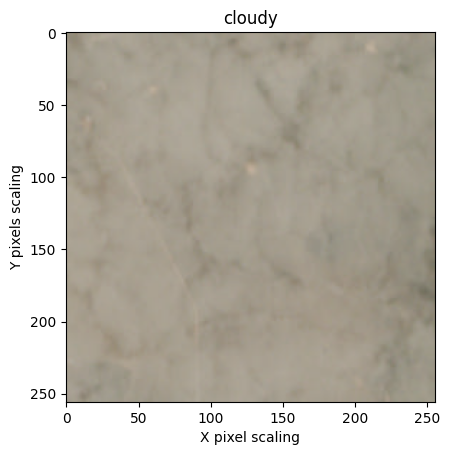

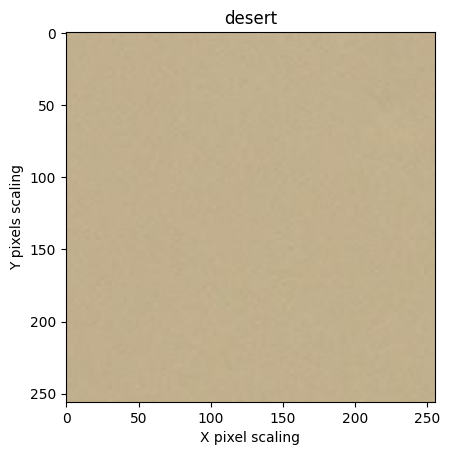

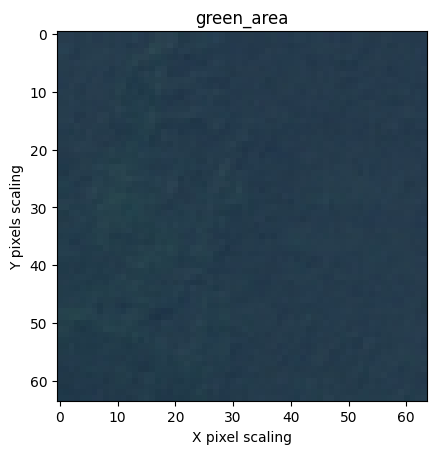

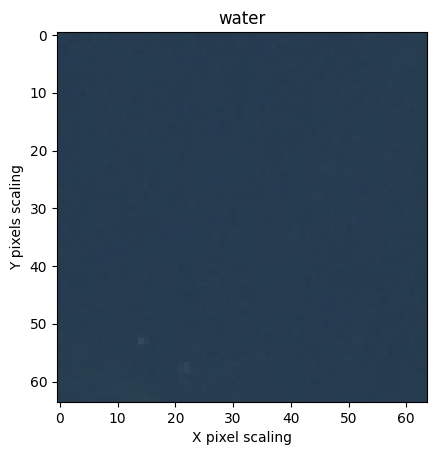

In [4]:
for label in class_names:
    path = os.listdir(train_dataset + '/' + label)
    img = train_dataset + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

### Load Dataset

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dataset,
                                                         batch_size = 32,
                                                         image_size=(64, 64),
                                                         subset = 'training',
                                                         validation_split= 0.2,
                                                         seed = 123
                                                         )



Found 5631 files belonging to 4 classes.
Using 4505 files for training.


In [6]:
validation_data = tf.keras.utils.image_dataset_from_directory(train_dataset,
                                                         batch_size = 16,
                                                         image_size=(64, 64),
                                                         validation_split= 0.2,
                                                         subset='validation',
                                                         seed = 123
                                                         )

Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


### Create Model (CNN)

In [25]:
from tensorflow.keras.layers import MaxPooling2D
# Build the model
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers with dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20,
                    callbacks=[early_stopping]
                    )

Epoch 1/20
141/141 [==============================] - 6s 21ms/step - loss: 0.4257 - accuracy: 0.8548 - val_loss: 1.5726 - val_accuracy: 0.2638
Epoch 2/20
141/141 [==============================] - 4s 26ms/step - loss: 0.2145 - accuracy: 0.9239 - val_loss: 2.1259 - val_accuracy: 0.2806
Epoch 3/20
141/141 [==============================] - 3s 19ms/step - loss: 0.1636 - accuracy: 0.9383 - val_loss: 1.0445 - val_accuracy: 0.7300
Epoch 4/20
141/141 [==============================] - 3s 20ms/step - loss: 0.1404 - accuracy: 0.9521 - val_loss: 1.4387 - val_accuracy: 0.7398
Epoch 5/20
141/141 [==============================] - 3s 20ms/step - loss: 0.1212 - accuracy: 0.9556 - val_loss: 1.4294 - val_accuracy: 0.7602
Epoch 6/20
141/141 [==============================] - 4s 27ms/step - loss: 0.1025 - accuracy: 0.9656 - val_loss: 0.1968 - val_accuracy: 0.9307
Epoch 7/20
141/141 [==============================] - 3s 22ms/step - loss: 0.0683 - accuracy: 0.9762 - val_loss: 0.0351 - val_accuracy: 0.9893

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 29, 29, 64)      

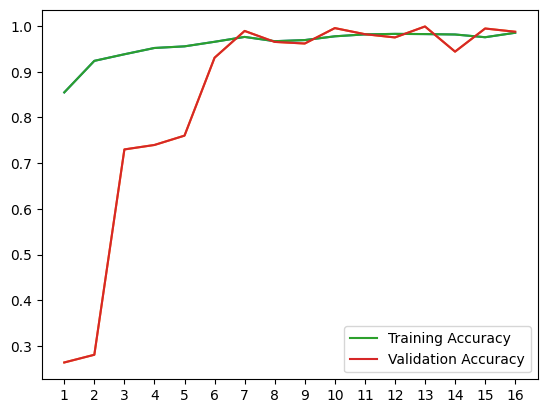

In [29]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy)
plt.plot(val_accuracy)

# Plotting the data
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')


# Adding labels or indices to the x-axis ticks
plt.xticks(range(len(train_accuracy)), labels=range(1, len(train_accuracy)+1))

# Adding a legend to the graph
plt.legend()

# Displaying the graph
plt.show()

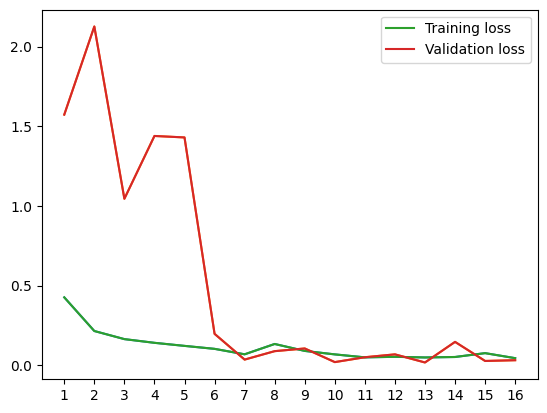

In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)

# Plotting the data
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')


# Adding labels or indices to the x-axis ticks
plt.xticks(range(len(train_loss)), labels=range(1, len(train_loss)+1))

# Adding a legend to the graph
plt.legend()

# Displaying the graph
plt.show()

### Evaluation

In [31]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(train_data)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

141/141 [==============================] - 2s 12ms/step - loss: 0.0096 - accuracy: 0.9964
Test Loss: 0.009611260145902634
Test Accuracy: 0.9964483976364136
